# <b>Unsupervised Learning Week: Clustering</b>

**Goals**

- Clustering. What is it? Why is it used? What makes it qualify as unsupervised learning.
- KMeans: The most popular clustering algorithm. How to use KMeans with Sklearn. 
- How to evaluate KMeans using Sklearn.
- In class workshop: pick a dataset and do some clustering!!

## What is clustering? What is unsupervised learning?

In [ ]:
#basically categorizing different variables 

## Clustering

Clustering comes natural to humans. We categorize each others, things, and other phenomenon all the time i.e. Millennials vs Generation X vs Boomers and Tudor vs Hacienda vs Contemporary houses. Categorizing helps us better understand things; if you tell me a certain person or thing belongs to a certain label, then I immediately gain a better understanding of their or its purpose.
<br><br>
What do you think are real world applications of clustering? Why would this be valuable to a business?
<br><br>
"Clustering is a technique for finding similarity groups in a data, called clusters. It attempts to group individuals in a population together by similarity, but not driven by a specific purpose." http://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/
<br><br>
<b>CLUSTERING IS UNSUPERVISED LEARNING BECAUSE THERE ARE NO LABELS LIKE IN SUPERVISED LEARNING. THE POINT OF CLUSTERING IS TO GENERATE NEW LABELS FROM UNLABELLED DATA<b>

In [4]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [2]:
#Make fake data to visualize
data = make_blobs(n_samples=250, centers = 4, cluster_std=.75, random_state=4)[0]

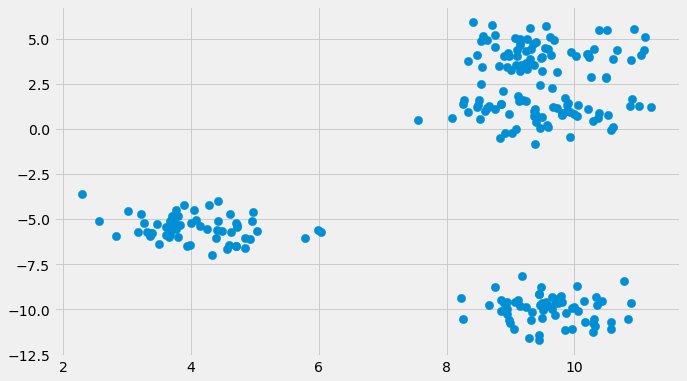

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68);

### How many clusters do you see?

Clustering is usually never this easy. Let's look at some more difficult data.

In [4]:
#Make fake data
data = make_classification(n_samples=400, n_features=2,n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=1)[0]

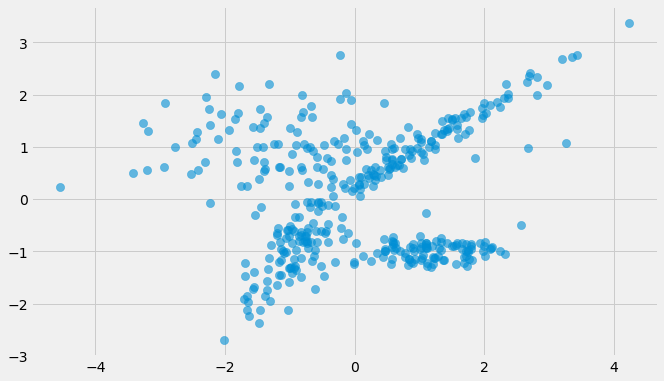

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

## KMeans Algorithm

- The most popular clustering algorithm
- K in Kmeans stands for the number of clusters and centriods predetermined by you the data scientist.
- Centriods are the center point of each cluster. The average of all of the points in the cluster, hence the means in kmeans.
- A point is assigned to the cluster of the centriod it is closest to.
- Algorithms works by randomly assigning centriods within the data and shifts the centriods until they reach convergence.
- Basically means the algorithm keeps going until it finds the smallest value produced by this function:
$$∑(x¯c−xi)2$$
<br><br>
### KMeans in action

![a](http://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

Interactive version:

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

**Things to keep in mind**

- Needs features on the same or similar scales to be effective. 

- Vulnerable to noise from too many features.

- Assumes a linear boundary between clusters, which is not always the case as we're about to see.

### Clustering Time

We're going to use KMeans to cluster different forms of data to demonstrate how abilities and limitations of KMeans.

Let's bring back the blobs and use KMeans on it.

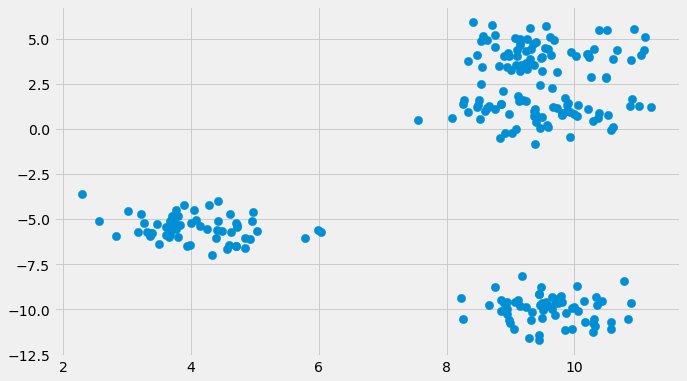

In [6]:
#Make fake data to visualize
data = make_blobs(n_samples=250, centers = 4, cluster_std=.75, random_state=4)[0]

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68);

In [8]:
#Intialize the KMeans algorithm with 3 clusters
km3 = KMeans(n_clusters=3)


#Fit model on data
km3.fit(data)

#Get the labels
labels = km3.labels_

labels




array([2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0], dtype=int32)

In [9]:
#Can derive labels this way as well

km3.predict(data)

array([2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0], dtype=int32)

In [10]:
#The counts of labels
pd.value_counts(labels)

1    126
2     62
0     62
dtype: int64

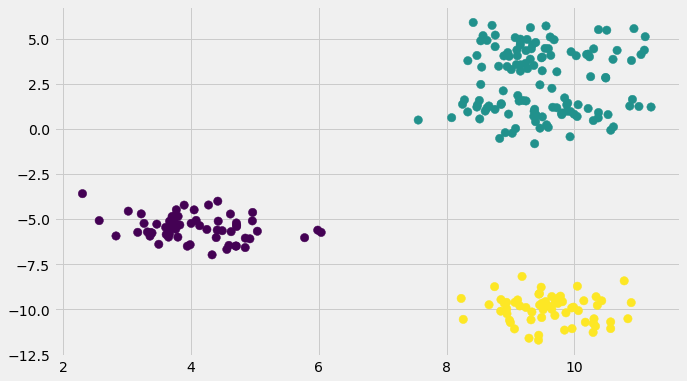

In [15]:
#Visualize the data with the color-encoded labels

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=70, c=labels);


Is this what you expected?


Centriods: The center point of each cluster. Equivalent to the average of the attributes for each label

Let's replot the above chart but with the centriods.

In [14]:
#Centriod values
centriods = km3.cluster_centers_
centriods

array([[ 4.07638897, -5.47320984],
       [ 9.47719408,  2.61510626],
       [ 9.61095813, -9.97869912]])

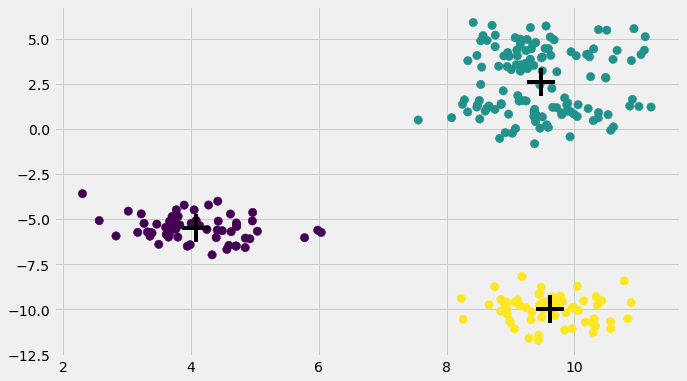

In [16]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=70, c=labels)
plt.scatter(centriods[ : , 0], centriods[ : , 1], s = 800, marker="+", c = "black")
plt.show()


Let's try it again with four clusters

In [17]:
#Intialize the KMeans algorithm with 4 clusters

km4 = KMeans(n_clusters=4)

#Fit model on data
km4.fit(data)
#Get the labels

labels =km4.labels_

labels

array([0, 2, 1, 1, 0, 3, 3, 3, 1, 2, 1, 0, 0, 0, 2, 3, 2, 1, 0, 2, 1, 2, 1,
       1, 2, 0, 1, 2, 3, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 1, 0, 1, 3, 0, 3,
       1, 0, 0, 3, 0, 0, 2, 3, 2, 0, 1, 0, 1, 2, 3, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 0, 3, 2, 0, 3, 2, 0, 0, 1, 3, 2, 1, 0, 3, 0, 3, 2, 2, 1, 3, 3,
       1, 2, 3, 0, 1, 1, 0, 3, 1, 3, 0, 1, 2, 2, 1, 1, 1, 3, 3, 2, 0, 0, 1,
       2, 3, 3, 3, 3, 2, 1, 1, 2, 2, 0, 0, 3, 0, 3, 3, 2, 0, 3, 3, 3, 0, 3,
       3, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 3, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 2,
       2, 2, 1, 1, 0, 3, 0, 1, 1, 1, 1, 0, 0, 3, 2, 2, 3, 0, 1, 0, 1, 1, 3,
       0, 0, 2, 3, 1, 1, 2, 1, 2, 2, 1, 3, 2, 1, 2, 3, 3, 1, 2, 3, 2, 0, 3,
       2, 3, 2, 1, 2, 0, 0, 2, 3, 3, 0, 3, 2, 0, 0, 1, 2, 3, 0, 0, 0, 1, 3,
       2, 2, 0, 0, 0, 3, 2, 0, 3, 1, 1, 3, 3, 0, 3, 0, 3, 2, 1, 2], dtype=int32)

In [18]:
#The counts of labels
pd.value_counts(labels)

3    63
1    63
2    62
0    62
dtype: int64

In [21]:
#Centroids
centriods = km4.cluster_centers_

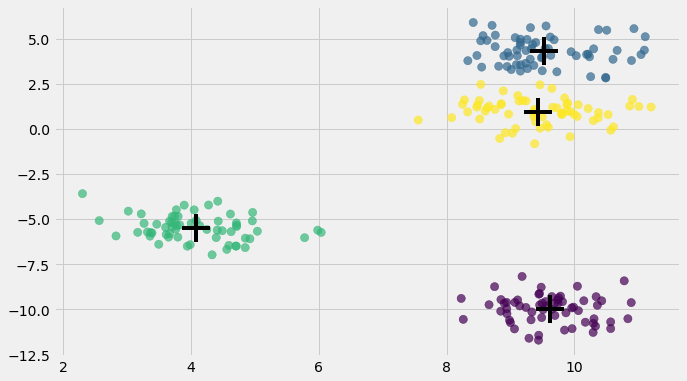

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, c=labels, alpha=.7)
plt.scatter(centriods[ : , 0], centriods[ : , 1], s = 800, marker="+", c = "black");

Does this change your answer to the "How many clusters do you see?" question.

Cluster the random data from earlier

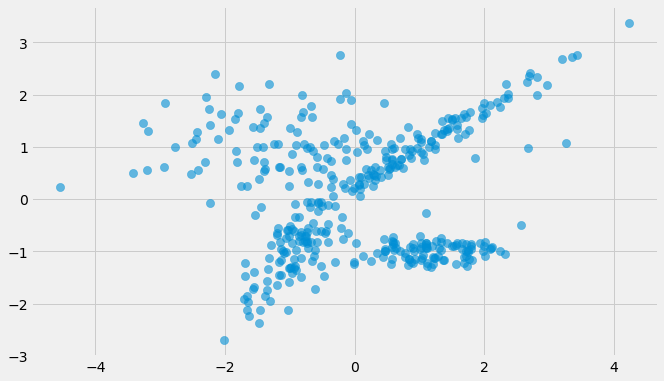

In [23]:
#Make fake data
data = make_classification(n_samples=400, n_features=2,n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=1)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

What cluster value should we set?

In [26]:
#Intialize the KMeans algorithm with 4 clusters

km4 = KMeans(n_clusters=4)

#Fit model on data
km4.fit(data)

#Get the labels

labels = km4.labels_

#Assign centriods

cents4 = km4.cluster_centers_

#Values counts of labels

pd.value_counts(labels)

0    120
3    113
2     92
1     75
dtype: int64

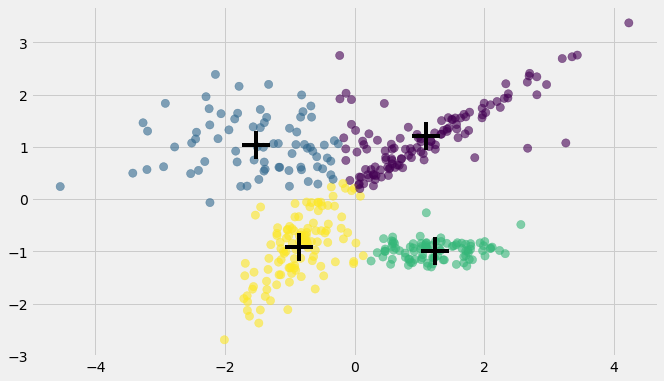

In [27]:
#Visualize color-encoded data
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, c=labels, alpha=.6)
plt.scatter(cents4[ : , 0], cents4[ : , 1], s = 800, marker="+", c = "black")
plt.show();

Is this what you expected?

Let's try this on "moons" data.

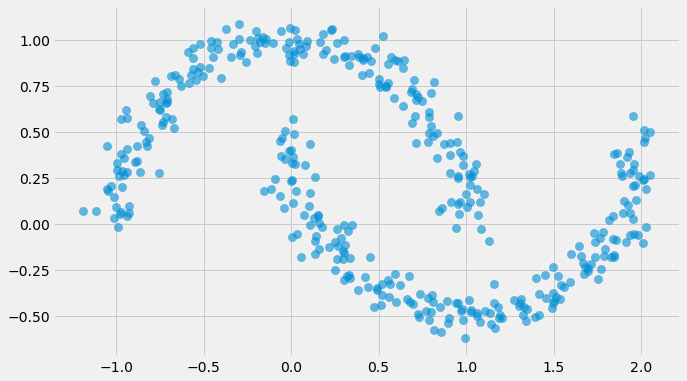

In [28]:
#Make moon data

data = make_moons(n_samples=400, noise=.07)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

Cluster with 2 clusters

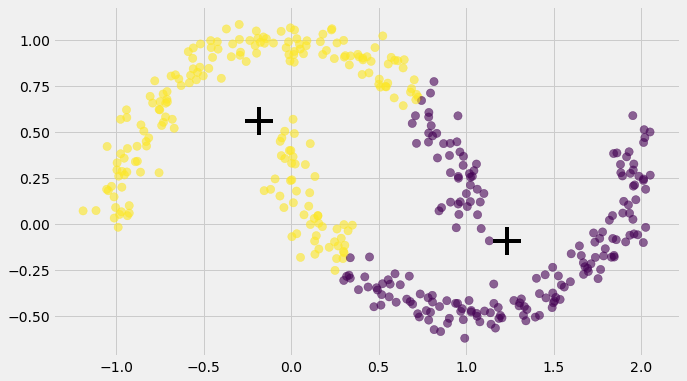

In [29]:
#Intialize the KMeans algorithm with 2 clusters

km2 = KMeans(n_clusters=2)

#Fit model on data

km2.fit(data)
#Get the labels

labels = km2.labels_

#Centriods

cents2 = km2.cluster_centers_


#Visualize color-encoded data
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, c=labels, alpha=.6)
plt.scatter(cents2[ : , 0], cents2[ : , 1], s = 800, marker="+", c = "black")
plt.show();

How do you rate the results of this clustering algorithm?

Let's use KMeans on "circles"

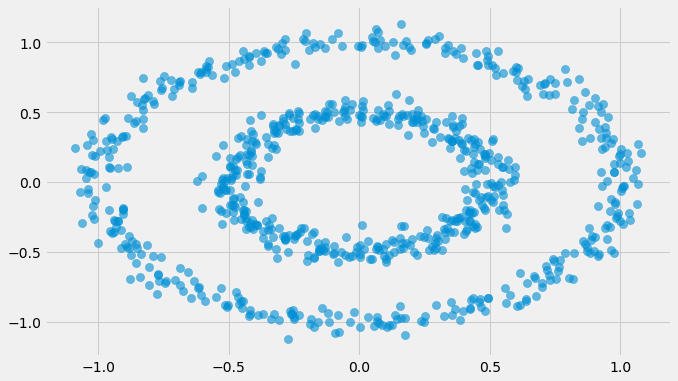

In [30]:
#Make circles data

data = make_circles(n_samples=800, noise=.05, factor=0.5)[0]

#Visualize
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, alpha=.6);

How do you think this data will interact with KMeans?

Let's find out.

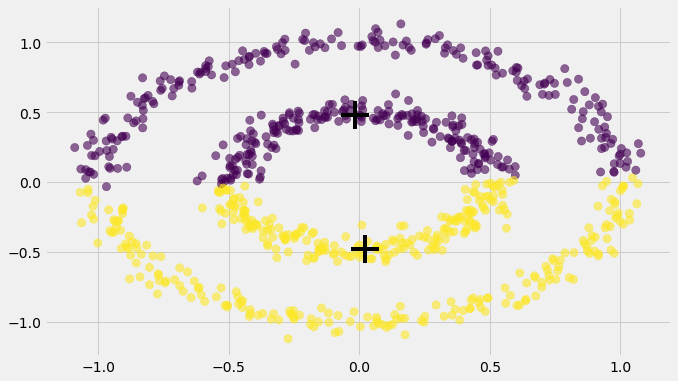

In [31]:
#Intialize the KMeans algorithm with 2 clusters

km2 = KMeans(n_clusters=2)

#Fit model on data
km2.fit(data)

#Get the labels

labels = km2.labels_

#Centriods

cents2 = km2.cluster_centers_


#Visualize color-encoded data
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=68, c=labels, alpha=.6)
plt.scatter(cents2[ : , 0], cents2[ : , 1], s = 800, marker="+", c = "black")
plt.show();

Does this match your expectation?

KMeans is great but not it's not perfect, there's other algorithm that are better clustering the the types of data KMean is not good at clustering.

<br>

Now let's use KMeans on real world data.

## Clustering Country Data

<br>

- In this section we're going to use KMeans to cluster countries based on their socio-economic attributes such as unemployment, electricity, and infant mortality.

- How to evaluate clusters using the elbow method and silhouette score

- Scaling features improves results

In [32]:
path = "../../data/country_development_data.pkl"

#Load in data and assign it to df
df = pd.read_pickle(path)

#Look at first five rows
df.head()

IndicatorCode,Access to electricity (% of population),Renewable electricity output (% of total electricity output),CO2 emissions (metric tons per capita),"Commercial bank branches (per 100,000 adults)",Depth of credit information index (0=low to 8=high),Strength of legal rights index (0=weak to 12=strong),Mobile cellular subscriptions (per 100 people),Internet users (per 100 people),GDP per capita (current US$),Proportion of seats held by women in national parliaments (%),...,Health expenditure per capita (current US$),"Labor force, female (% of total labor force)","Unemployment, total (% of total labor force)",Net migration,"Mortality rate, infant (per 1,000 live births)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Population, ages 0-14 (% of total)","Age dependency ratio, young (% of working-age population)",Urban population (% of total)
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.0,0.000000,0.425262,2.465221,0.0,9.0,74.882842,6.39,633.569247,27.710843,...,54.964148,16.051439,9.1,473007,66.3,60.028268,60.48056,44.870996,85.153384,26.282
Albania,100.0,100.000000,1.607038,22.241690,6.0,7.0,105.469966,60.10,4564.390339,20.714286,...,239.577092,41.266475,16.1,-91750,12.5,77.537244,90.56197,18.930427,27.432462,56.409
Algeria,100.0,1.083680,3.316038,5.064181,0.0,2.0,93.310750,18.09,5484.066806,31.601732,...,313.520212,17.376156,9.5,-143268,21.9,74.568951,85.02157,28.205909,42.742285,70.129
Angola,37.0,70.906823,1.354008,12.863257,0.0,1.0,63.479208,21.26,5900.529570,36.818182,...,267.224299,46.204554,6.8,102322,96.0,51.866171,49.09112,47.850317,96.005760,43.274
Argentina,99.8,23.769069,4.562049,13.303817,8.0,2.0,158.735762,64.70,12509.531118,36.186770,...,1074.066944,40.431360,8.2,30000,11.1,75.986098,87.23494,25.346427,39.700196,91.604


In [34]:
#Shape

df.shape

(159, 21)

159 countries and 21 attributes.

In [35]:
#Look at columns
df.columns

Index(['Access to electricity (% of population)',
       'Renewable electricity output (% of total electricity output)',
       'CO2 emissions (metric tons per capita)',
       'Commercial bank branches (per 100,000 adults)',
       'Depth of credit information index (0=low to 8=high)',
       'Strength of legal rights index (0=weak to 12=strong)',
       'Mobile cellular subscriptions (per 100 people)',
       'Internet users (per 100 people)', 'GDP per capita (current US$)',
       'Proportion of seats held by women in national parliaments (%)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Health expenditure per capita (current US$)',
       'Labor force, female (% of total labor force)',
       'Unemployment, total (% of total labor force)', 'Net migration',
       'Mortality rate, infant (per 1,000 live births)',
       'Life expectancy at birth, total (years)',
       'Survival to age 65, female (% of cohor

In [36]:
#Rename cols to make things easier

new_cols = ["electric_accces", "renewables_percent", "co2_emissions", "commercial_bank",
           "credit_information_index_depth", "legal_rights", "cell_phone_usage",
           "internet_users","gdp_per_cap", "women_politicians", "communicable_disease_rate", "health_per_cap",
           "female_labor_rate", "unemploy_rate", "net_migration", "mortality_rate", "life_exp",
           "female_survival_65", "child_popul", "age_depend_ratio", "urban_pop"]

df.columns = new_cols

df.head()


,electric_accces,renewables_percent,co2_emissions,commercial_bank,credit_information_index_depth,legal_rights,cell_phone_usage,internet_users,gdp_per_cap,women_politicians,...,health_per_cap,female_labor_rate,unemploy_rate,net_migration,mortality_rate,life_exp,female_survival_65,child_popul,age_depend_ratio,urban_pop
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,43.0,0.000000,0.425262,2.465221,0.0,9.0,74.882842,6.39,633.569247,27.710843,...,54.964148,16.051439,9.1,473007,66.3,60.028268,60.48056,44.870996,85.153384,26.282
Albania,100.0,100.000000,1.607038,22.241690,6.0,7.0,105.469966,60.10,4564.390339,20.714286,...,239.577092,41.266475,16.1,-91750,12.5,77.537244,90.56197,18.930427,27.432462,56.409
Algeria,100.0,1.083680,3.316038,5.064181,0.0,2.0,93.310750,18.09,5484.066806,31.601732,...,313.520212,17.376156,9.5,-143268,21.9,74.568951,85.02157,28.205909,42.742285,70.129
Angola,37.0,70.906823,1.354008,12.863257,0.0,1.0,63.479208,21.26,5900.529570,36.818182,...,267.224299,46.204554,6.8,102322,96.0,51.866171,49.09112,47.850317,96.005760,43.274
Argentina,99.8,23.769069,4.562049,13.303817,8.0,2.0,158.735762,64.70,12509.531118,36.186770,...,1074.066944,40.431360,8.2,30000,11.1,75.986098,87.23494,25.346427,39.700196,91.604


Let's pick 5 - 7 of the 21 attributes to work with. Attributes need to be fairly different from one another.

In [39]:
#Creat subset list of columns
subset = ['gdp_per_cap', 'mortality_rate','renewables_percent', 
          'internet_users','female_labor_rate', 'female_survival_65', 'legal_rights']

df2 = df[subset].copy()

df2.head()


,gdp_per_cap,mortality_rate,renewables_percent,internet_users,female_labor_rate,female_survival_65,legal_rights
CountryName,,,,,,,
Afghanistan,633.569247,66.3,0.000000,6.39,16.051439,60.48056,9.0
Albania,4564.390339,12.5,100.000000,60.10,41.266475,90.56197,7.0
Algeria,5484.066806,21.9,1.083680,18.09,17.376156,85.02157,2.0
Angola,5900.529570,96.0,70.906823,21.26,46.204554,49.09112,1.0
Argentina,12509.531118,11.1,23.769069,64.70,40.431360,87.23494,2.0


Let's cluster the countries using 2, 3, and 5 clusters

2 Clusters:

In [40]:
#Make a copy of df2 and assign it to X

X = df2.copy()
#Intialize kmeans with 2 clusters and random_state = 10
km2 = KMeans(n_clusters=2, random_state=10)

#Fit model on X
km2.fit(X)

#Generate labels

##Method 1

labs2 = km2.labels_

##Method 2
labs2 = km2.predict(X)

#Value_counts
pd.value_counts(labs2)

1    135
0     24
dtype: int64

In [41]:
#Cluster centriods

km2.cluster_centers_


array([[  5.71927409e+04,   3.33750000e+00,   3.27606158e+01,
          8.65895833e+01,   4.37954241e+01,   9.18382942e+01,
          5.91666667e+00],
       [  7.05328270e+03,   2.78555556e+01,   2.56242691e+01,
          3.68185184e+01,   4.11020911e+01,   7.51607851e+01,
          4.94074074e+00]])

In [44]:
#Add labels to the dataframe

df2["labs2"] = labs2

df2.groupby("labs2").mean()

,gdp_per_cap,mortality_rate,renewables_percent,internet_users,female_labor_rate,female_survival_65,legal_rights
labs2,,,,,,,
0,57192.740861,3.337500,32.760616,86.589583,43.795424,91.838294,5.916667
1,7053.282696,27.855556,25.624269,36.818518,41.102091,75.160785,4.940741


What separates the two clusters? How would you describe cluster 0 and cluster 1?

### Evaluation clusters silhouette score

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations. Ideally, you want a score greater than at least 0.2.

![w](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png)

![a](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png)

![e](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

![t](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_004.png)

![y](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_005.png)
Source: Sci-kit learn

Derive silhouette score of country data and labels

In [45]:
#Pass in df2 without labs2 column and the labs2 variable into silhouette_score function
silhouette_score(X, labs2)

0.79216396713415593

3 Clusters

In [47]:
#Intialize kmeans with 3 clusters and random_state = 10
km3 = KMeans(n_clusters=3, random_state=100)

#Fit model
km3.fit(X)

#Generate labels

##Method 1

labs3 = km3.labels_

##Method 2




#Add labs3 to df2

df2["labs3"] = labs3

#Value_counts

df2.labs3.value_counts()

1    132
0     23
2      4
Name: labs3, dtype: int64

Silhouette scoring

In [48]:
silhouette_score(X, labs3)

0.77563715596440397

Analyze clusters by looking at centriods

In [52]:
df2.groupby("labs3").mean()

,gdp_per_cap,mortality_rate,renewables_percent,internet_users,female_labor_rate,female_survival_65,legal_rights,labs2
labs3,,,,,,,,
0,46141.722000,3.273913,28.440050,84.284348,44.805358,92.095792,6.260870,0.130435
1,6570.158526,28.421212,25.931116,35.914015,41.048226,74.737155,4.924242,1.000000
2,99074.603307,3.425000,42.125678,92.365000,37.745868,91.829350,3.750000,0.000000


What are the three types of countries?

Let's compare the two sets of labels

In [53]:
#Pass in the labs2 and labs3 columns of df2 into pandas crosstab function

pd.crosstab(labs2, labs3)

col_0,0,1,2
row_0,,,
0,20,0,4
1,3,132,0


What do you notice about this table?

Exercise: Analyze the data using five clusters

In [56]:
#Intialize kmeans with 5 clusters and random_state = 10

km5 = KMeans(n_clusters=5, random_state=10)
#Fit model
km5.fit(X)

#Generate labels

labs5 = km5.labels_

#Add labs5 to df2

df2["labs5"] = labs5

#Value_counts
pd.value_counts(labs5)

0    95
4    29
1    16
2    15
3     4
dtype: int64

In [57]:
#Silhoeute score
silhouette_score(X, labs5)

0.650454288558866

In [61]:
#Centriods
df2.groupby("labs5").mean().rank(ascending=False)

,gdp_per_cap,mortality_rate,renewables_percent,internet_users,female_labor_rate,female_survival_65,legal_rights,labs2,labs3
labs5,,,,,,,,,
0,5.0,1.0,3.0,5.0,3.0,5.0,3.0,1.5,2.5
1,2.0,5.0,2.0,2.0,1.0,2.0,1.0,4.5,5.0
2,3.0,3.0,5.0,3.0,4.0,3.0,4.0,3.0,4.0
3,1.0,4.0,1.0,1.0,5.0,1.0,5.0,4.5,1.0
4,4.0,2.0,4.0,4.0,2.0,4.0,2.0,1.5,2.5


What are the five different types of countries?

Plotting time. Let's plot a range of cluster values versus silhouette scores. Make a validation curve similar to how we did with KNN and neighbors or Decision Trees and max_depth.

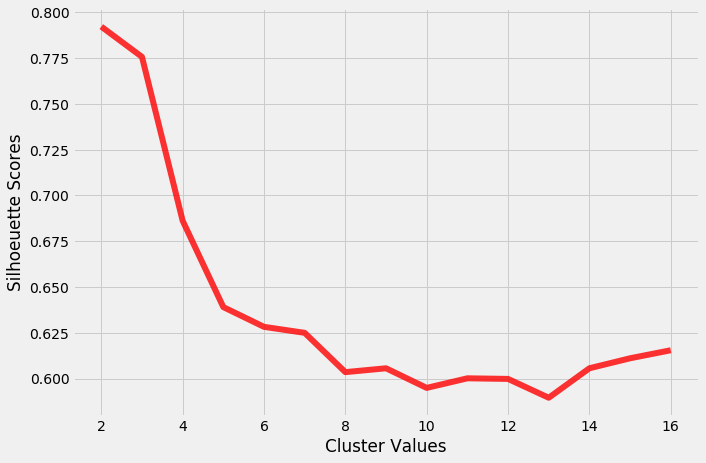

In [67]:
#Intialize range of cluster values from 2 to 16
cluster_range = list(range(2,17))

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores
for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    labels = model.labels_
    score = silhouette_score(X, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");



Whats the best cluster value?

Elbow method cluster evaluation

In [68]:
#Call interia score on km5 good for large data sets 

km5.inertia_

2353386091.1699963

["Inertia, or the within-cluster sum of squares criterion (SSE), can be recognized as a measure of how internally coherent clusters are."](http://scikit-learn.org/stable/modules/clustering.html)

We're going to plot a range of cluster values versus the inertia score in order to determine the best cluster value using the "elbow method."

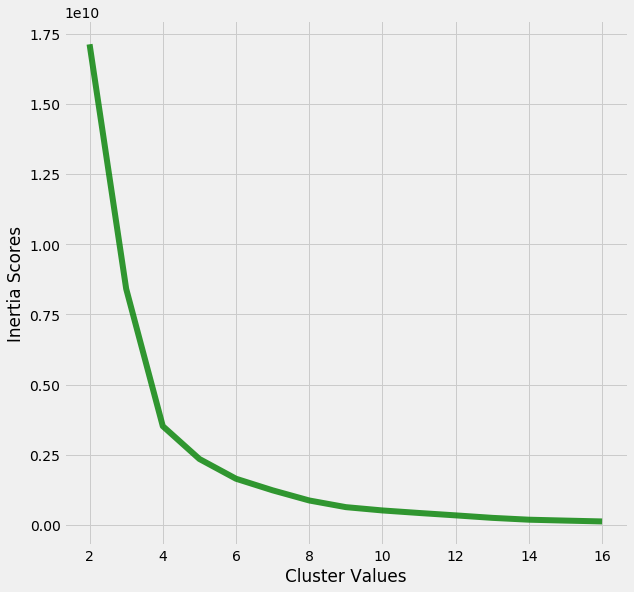

In [69]:
#Intialize range of cluster values from 2 to 16
cluster_range = list(range(2, 17))

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    score = model.inertia_
    i_scores.append(score)

#Plot clusters versus scores
plt.figure(figsize=(9,9))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")


plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

Where is the "elbow" in this chart? The elbow is where the best K value lies. 

Imagine the line as an arm.

Increasing K is always going to decrease the SSE, but what's the point of using a KMeans algorithm with 1000 K-value algorithm on a 1000 row dataset.

We want to choose a K that's at the beginning of the diminishing margin of returns.

### Scaling features and KMeans

We're going to demonstrate the need for scaling by clustering the data with all of the attributes

In [70]:
#Reassign X

X = df.copy()

Cluster with k = 3

In [71]:
#Intialize kmeans with 3 clusters and random_state = 10
km3 = KMeans(n_clusters=3, random_state=10)

#Fit model
km3.fit(X)

#Generate labels

labs3 = km3.labels_

#Value_counts
pd.value_counts(labs3)

0    154
1      4
2      1
dtype: int64

In [72]:
#Silhouette score
silhouette_score(X, labs3)

0.81645134382385731

You can't really say that there are clusters here. Two-thirds of the clusters only account for 3 percent of the data. This is evidence of outliers skewing the dataset. So even though, we're producing a high silhouette score, this isn't much of a cluster analysis

Let's go ahead and scale the data and refit a clustering algorithm

In [73]:
#Intialize scaler

ss = StandardScaler()

#Fit and transform scaler on data

Xs = ss.fit_transform(X)
#Intialize kmeans with 3 clusters and random_state = 10
km3s = KMeans(n_clusters=3, random_state=10)

#Fit model
km3s.fit(Xs)

#Generate labels

labs3s = km3s.labels_

#Value_counts
pd.value_counts(labs3s)

0    85
1    49
2    25
dtype: int64

In [75]:
#Score

silhouette_score(Xs, labs3s)

0.2532174099886294

A lower score but not a good score.



Let's go ahead and look at some of the countries in each cluster.

We're going randomly pick 10 countries from each cluster (0, 1, 2)

In [76]:
#Create dataframe with countries as indices and use labs3_s as the values
country_labels = pd.DataFrame(index=df.index, data = labs3s, columns =["cluster"])

country_labels.head()



,cluster
CountryName,
Afghanistan,1
Albania,0
Algeria,0
Angola,1
Argentina,0


In [84]:
#Cluster 0

country_labels[country_labels.cluster == 0].sample(n=10).index

Index(['Bahamas, The', 'Ukraine', 'Montenegro', 'Kazakhstan', 'India',
       'Honduras', 'Croatia', 'Uruguay', 'Mauritius', 'Macedonia, FYR'],
      dtype='object', name='CountryName')

In [85]:
#Cluster 1
country_labels[country_labels.cluster == 1].sample(n=10).index


Index(['Guinea', 'Malawi', 'Sudan', 'Niger', 'Uganda', 'Ethiopia', 'Namibia',
       'Rwanda', 'Bangladesh', 'Cote d'Ivoire'],
      dtype='object', name='CountryName')

In [86]:
#Cluster 2

country_labels[country_labels.cluster == 2].sample(n=10).index

Index(['Japan', 'Italy', 'Sweden', 'Israel', 'New Zealand', 'Finland',
       'United Kingdom', 'Luxembourg', 'Korea, Rep.', 'Switzerland'],
      dtype='object', name='CountryName')

Let's give actual names to the clusters. What would you rename cluster 0, 1, and 2 as?

Let's make validation curves using both silhoeutte and inertia scores

Sihouette Score Plot:

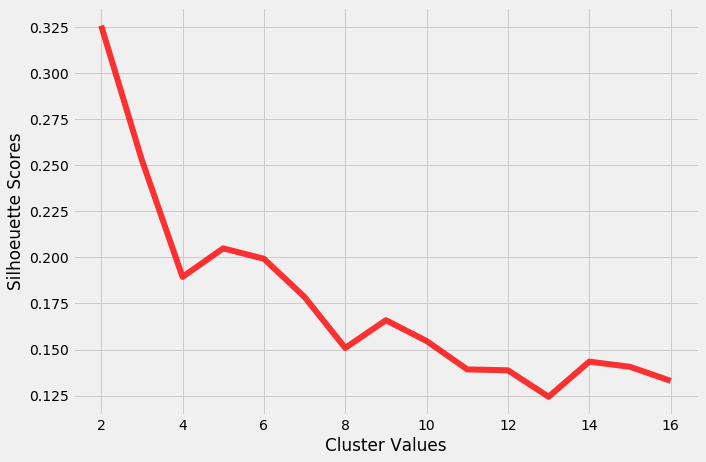

In [87]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    labels = model.labels_
    score = silhouette_score(Xs, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");

Inertia Scores Plot:

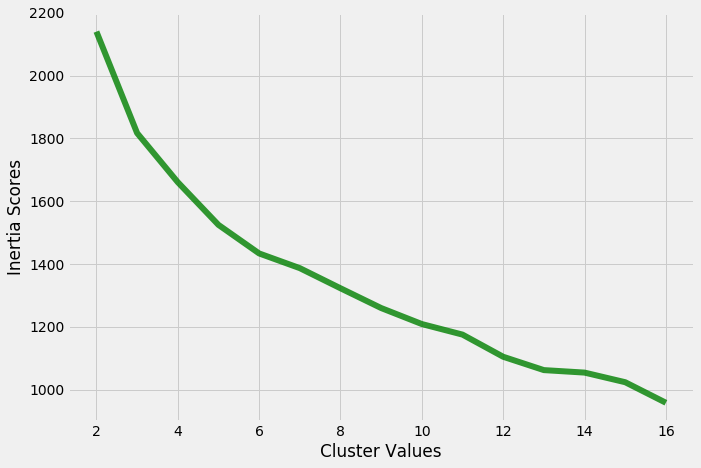

In [88]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xs)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");

What's the ideal number of clusters? Which plot should we use to determine that ?

**The hardest part of clustering is that it's hard to find the right answers!!**

# Resources:

**Kmeans:**

- https://kapilddatascience.wordpress.com/2015/09/06/introduction-to-k-means-clustering-part-1/
- http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html
- Great code walk through of clustering project:https://github.com/net70/KMeans-Clustering---Scikit-Learn/blob/master/KMeans%20Clustering%20-%20Scikit-Learn.ipynb
- My favorite tutorial: https://www.datascience.com/blog/k-means-clustering
- Really like this too: https://github.com/YuChunLOL/kmeans-dbscan-tutorial/blob/master/tutorial_and_labs/clustering-tutorial.ipynb


## Other types of clustering

**Hierarchical/Agglomerative**

- https://onlinecourses.science.psu.edu/stat505/node/143
- https://www.youtube.com/watch?v=XJ3194AmH40
- http://uc-r.github.io/hc_clustering (In R, but still a good resource)
- http://people.revoledu.com/kardi/tutorial/Clustering/index.html
- https://www.coursera.org/learn/cluster-analysis/lecture/LYX9a/4-2-agglomerative-clustering-algorithms
- https://blog.biolab.si/2015/12/02/hierarchical-clustering-a-simple-explanation/

**DBScan**

- https://blog.dominodatalab.com/topology-and-density-based-clustering/
- https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- https://www.slideshare.net/ssakpi/density-based-clustering

# In Class Lab

For the rest of class, I want you to work on clustering a dataset.

- I recommend picking any of the following datasets:
    - amazon_cities_data.csv, fifa_data.csv, mushrooms.csv, spotify_data.csv, Pokemon.csv, world-happiness-report folder, acs2015_county_data.csv, nba_player_stats.csv, diamonds.csv.
    - You can also use any of other supervised learning datasets we've used, just make sure to remove the target variable.
    
- Determine the right number of clusters using both silhouette score and elbow methods. Cluster using both scaled and unscaled versions of the data.

- Use EDA to learn about your clusters. Visualize the differences between thems. Don't just use the avearage attributes of each cluster's attributes.

- At the end of the class, each one of use will take 2-3 minutes to explain their clustering. Tell us what dataset you chose, how many clusters there are, and briefly describe the characteristics of each cluster.

In [5]:
data = pd.read_csv("../../data/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.shape

(53940, 11)

In [7]:
subset = ['price','carat','depth']

df2 = data[subset]

df2.head()

,price,carat,depth
0,326,0.23,61.5
1,326,0.21,59.8
2,327,0.23,56.9
3,334,0.29,62.4
4,335,0.31,63.3


In [11]:
df3 = df2.iloc[0:1000]
df3.head()

,price,carat,depth
0,326,0.23,61.5
1,326,0.21,59.8
2,327,0.23,56.9
3,334,0.29,62.4
4,335,0.31,63.3


In [61]:

X = df3


km3 = KMeans(n_clusters=3, random_state = 10)

km3.fit(X)


#Method 1
labs = km2.labels_
#Method 2
labs = km2.predict(X)

#Value_counts
pd.value_counts(labs)

1    850
2     90
0     60
dtype: int64

In [66]:
labs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [62]:
silhouette_score(X,labs)

0.9709127049221663

In [64]:
km3 = km3.cluster_centers_
km3

array([[  3.73816667e+02,   2.67666667e-01,   6.15900000e+01],
       [  2.82843294e+03,   7.59364706e-01,   6.17120000e+01],
       [  5.54922222e+02,   3.08444444e-01,   6.19133333e+01]])

In [69]:
plt.scatter(X[:,0],labs[:,2], s=68, c=labels, alpha=.6)
plt.scatter(km3[ : , 0], km3[] : , 2], s = 800, marker="+", c = "black")
plt.show();

SyntaxError: invalid syntax (<ipython-input-69-d1a8a77f70b3>, line 2)

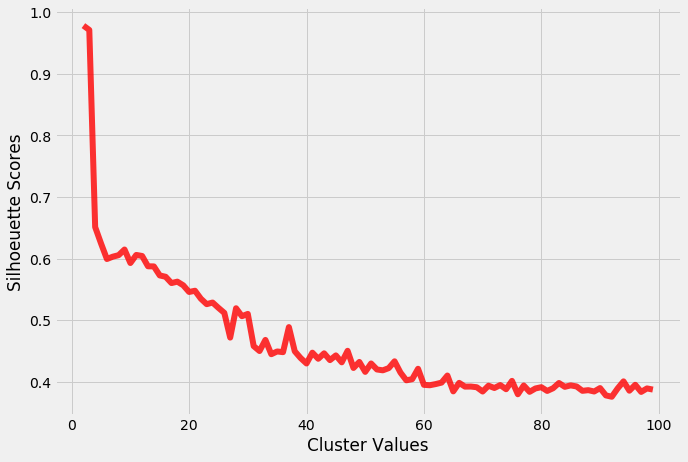

In [39]:
cluster_range = list(range(2, 100))

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    labels = model.labels_
    score = silhouette_score(X, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");

In [59]:
km3.inertia_

1309020.4586484446

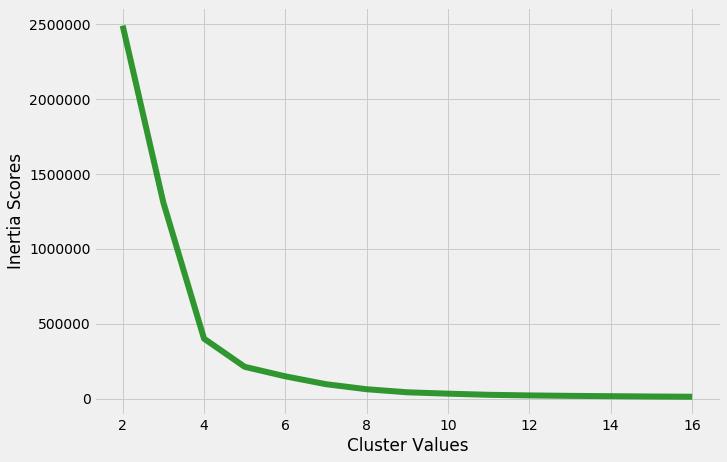

In [60]:
cluster_range = list(range(2, 17))

#Intialize list to store inertia scores

i_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");